# Chapter 2: Figures

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

The source code listings can be downloaded from http://www.apress.com/9781484205549

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format='retina'

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
def show_array(shape, sel, filename=None):
    """Visualize indexing of arrays"""

    data = np.zeros(shape)
    exec("data[%s] = 1" % sel)

    fig, ax = plt.subplots(1, 1, figsize=shape)

    ax.patch.set_facecolor('black')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    size = 0.97
    for (m, n), w in np.ndenumerate(data):
        color = '#1199ff' if w > 0 else '#eeeeee'
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        ax.text(m, n, "(%d, %d)" % (n, m), ha='center', va='center', fontsize=12)
        
    ax.autoscale_view()
    ax.invert_yaxis()

    if sel == ":, :":
        ax.set_title("data\n", fontsize=12)
    else:
        ax.set_title("data[%s]\n" % sel, fontsize=12)
    
    #fig.tight_layout()
    
    if filename:
        fig.savefig(filename + ".png", dpi=200)
        fig.savefig(filename + ".svg")
        fig.savefig(filename + ".pdf")

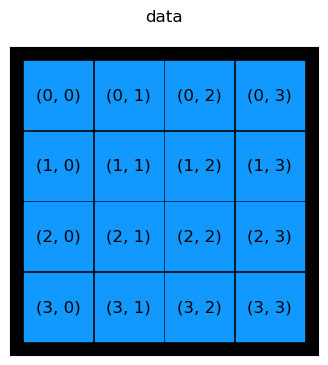

In [4]:
show_array((4, 4), ":, :", "array_indexing_1")

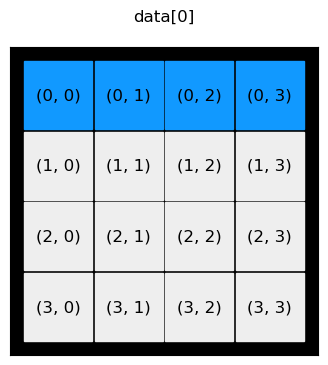

In [5]:
show_array((4, 4), "0", "array_indexing_2")

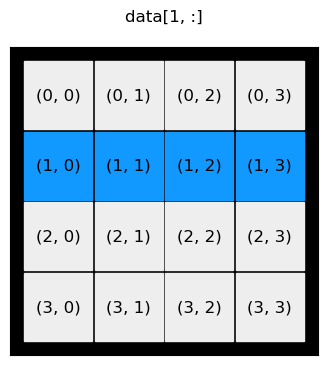

In [6]:
show_array((4, 4), "1, :", "array_indexing_3")

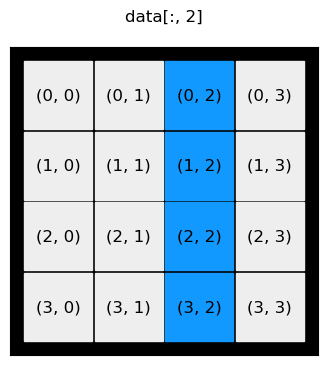

In [7]:
show_array((4, 4), ":, 2", "array_indexing_4")

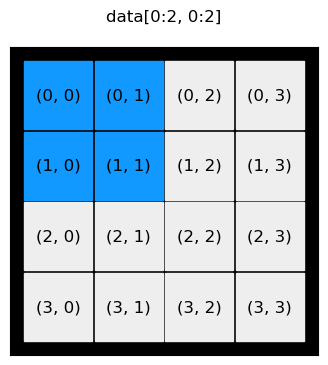

In [8]:
show_array((4, 4), "0:2, 0:2", "array_indexing_5")

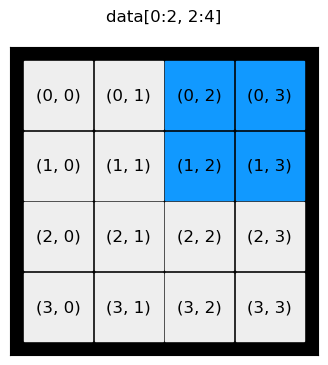

In [9]:
show_array((4, 4), "0:2, 2:4", "array_indexing_6")

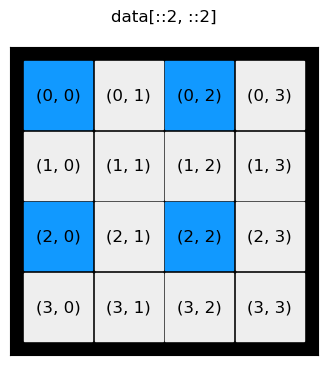

In [10]:
show_array((4, 4), "::2, ::2", "array_indexing_7")

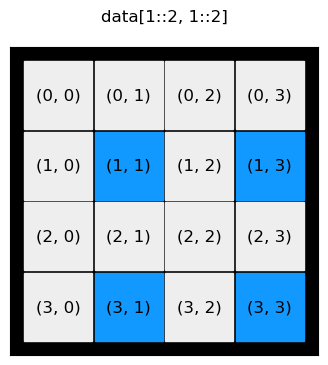

In [11]:
show_array((4, 4), "1::2, 1::2", "array_indexing_8")

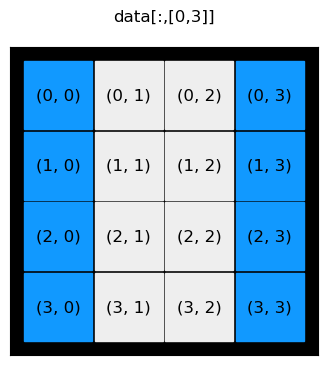

In [12]:
show_array((4, 4), ":,[0,3]", "array_indexing_9")

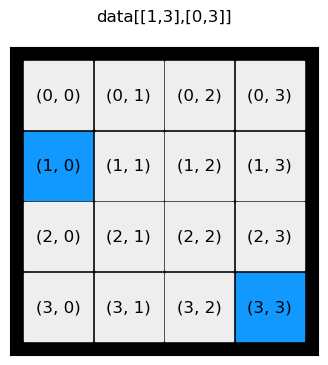

In [13]:
show_array((4, 4), "[1,3],[0,3]", "array_indexing_10")

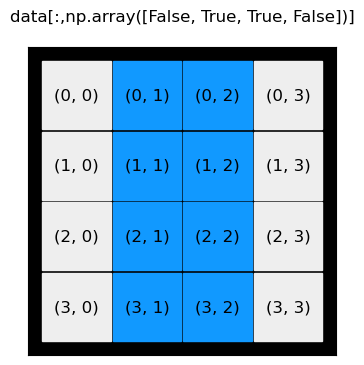

In [14]:
show_array((4, 4), ":,np.array([False, True, True, False])", "array_indexing_11")

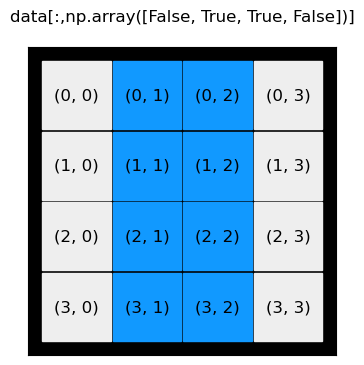

In [15]:
show_array((4, 4), ":,np.array([False, True, True, False])", "array_indexing_12")

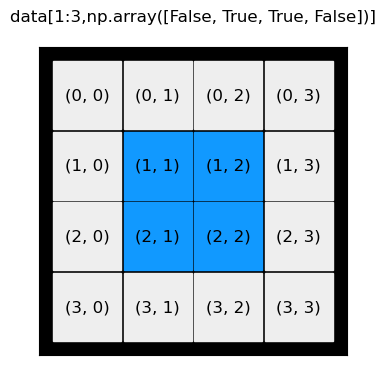

In [16]:
show_array((4, 4), "1:3,np.array([False, True, True, False])", "array_indexing_12")

## Summary

<table>
<tr>
<td><img src="./array_indexing_1.svg"></td>
<td><img src="./array_indexing_2.svg"></td>
<td><img src="./array_indexing_3.svg"></td>
<td><img src="./array_indexing_4.svg"></td>
</tr>
<tr>
<td><img src="./array_indexing_5.svg"></td>
<td><img src="./array_indexing_6.svg"></td>
<td><img src="./array_indexing_7.svg"></td>
<td><img src="./array_indexing_8.svg"></td>
</tr>
<tr>
<td><img src="./array_indexing_9.svg"></td>
<td><img src="./array_indexing_10.svg"></td>
<td><img src="./array_indexing_11.svg"></td>
<td><img src="./array_indexing_12.svg"></td>
</tr>
</table>

## Aggregation

In [17]:
data = np.arange(9).reshape(3,3)

In [18]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [19]:
data.sum()

36

In [20]:
data.sum(axis=0)

array([ 9, 12, 15])

In [21]:
data.sum(axis=1)

array([ 3, 12, 21])

In [22]:
def show_array_aggregation(data, axis, filename=None):
    """Visualize indexing of arrays"""
   
    fig, axes = plt.subplots(2, 1, figsize=(4, 8))

    
    ax = axes[0]
    ax.patch.set_facecolor('black')
    #ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    
    colors = ['#1199ff', '#ee3311', '#66ff22']
    
    for (m, n), w in np.ndenumerate(data):
        size = 0.97
        color = '#1199ff' if w > 0 else '#eeeeee'
        color = '#eeeeee'
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        if axis is None:
            color = '#1199ff'
        elif axis == 1:
            color = colors[m]
        else:
            color = colors[n]
            
        size = 0.8
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)

        ax.text(n, m, "%d" % data[m, n], ha='center', va='center', fontsize=12)
        
    ax.autoscale_view()
    ax.invert_yaxis()
    ax.set_title("data", fontsize=12)

    if False:
        ax = axes[1]
        ax.set_frame_on(False)
        ax.patch.set_facecolor('white')
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
        ax.set_xlim(0, 3)
        ax.set_ylim(0, 3)

        if axis is not None:
            ax.text(1.5, 1.5, "data.sum(axis=%d)" % axis, ha='center', va='center', fontsize=18)        
        else:
            ax.text(1.5, 1.5, "data.sum()", ha='center', va='center', fontsize=18)        

        ax.arrow(0.3, 1.25, 2.1, 0.0, head_width=0.1, head_length=0.2, fc='k', ec='k')

    if axis == 0:
        adata = data.sum(axis=axis)[:, np.newaxis]
    elif axis == 1:
        adata = data.sum(axis=axis)[:, np.newaxis]
    else:
        adata = np.atleast_2d(data.sum(axis=axis))
        
    ax = axes[1]
    ax.set_frame_on(False)
    ax.patch.set_facecolor('white')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    
    colors = ['#1199ff', '#ee3311', '#66ff22']
    
    for (m, n), w in np.ndenumerate(data):
        size = 1.0
        color = '#ffffff'
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                         size, size,
                         facecolor=color,
                         edgecolor=color)
        ax.add_patch(rect)        
    
    for (m, n), w in np.ndenumerate(adata):

        if axis is None:
            size = 1.0
            color = '#000000'
            rect = plt.Rectangle([1+m - size / 2, 0 + n - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
            ax.add_patch(rect)        
            size = 0.97
            color = '#eeeeee'

            
            rect = plt.Rectangle([1+m - size / 2, 0 + n - size / 2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)
            ax.add_patch(rect)

            
            if axis is None:
                color = '#1199ff'
            elif axis == 1:
                color = colors[n]
            else:
                color = colors[m]

            size = 0.8
            rect = plt.Rectangle([1+m - size / 2, 0 + n - size / 2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)
            ax.add_patch(rect)

            
            if n == 0:
                ax.text(1+m, n+0, "%d" % adata[m, n], ha='center', va='center', fontsize=10)

            
        if axis == 0:
            size = 1.0
            color = '#000000'
            rect = plt.Rectangle([m - size / 2, 0 + n - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
            ax.add_patch(rect)        
            size = 0.97
            color = '#eeeeee'

            
            rect = plt.Rectangle([m - size / 2, 0 + n - size / 2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)
            ax.add_patch(rect)

            
            if axis is None:
                color = '#1199ff'
            elif axis == 1:
                color = colors[n]
            else:
                color = colors[m]

            size = 0.8
            rect = plt.Rectangle([m - size / 2, 0 + n - size / 2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)
            ax.add_patch(rect)

            
            if n == 0:
                ax.text(m, n+0, "%d" % adata[m, n], ha='center', va='center', fontsize=10)

        if axis == 1:
            size = 1.0
            color = '#000000'
            rect = plt.Rectangle([0 + m - size / 2, n - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
            ax.add_patch(rect)        
            size = 0.97
            color = '#eeeeee'

            rect = plt.Rectangle([0 + m - size / 2, n - size / 2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)

            ax.add_patch(rect)

            if axis is None:
                color = '#1199ff'
            elif axis == 1:
                color = colors[m]
            else:
                color = colors[m]

            size = 0.8
            rect = plt.Rectangle([0 + m - size / 2, n - size / 2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)
            ax.add_patch(rect)
            
            if axis == 0 and m == 0:
                ax.text(m+0, n, "%d" % adata[m, n], ha='center', va='center', fontsize=12)
            if axis == 1 and n == 0:
                ax.text(m, n+0, "%d" % adata[m, n], ha='center', va='center', fontsize=10)

    ax.autoscale_view()
    ax.invert_yaxis()
    if axis is not None:
        ax.set_title("data.sum(axis=%d)" % axis, fontsize=12)
    else:
        ax.set_title("data.sum()", fontsize=12)
    
    fig.tight_layout()
    
    if filename:
        fig.savefig(filename + ".png", dpi=200)
        fig.savefig(filename + ".svg")
        fig.savefig(filename + ".pdf")

In [23]:
data = np.arange(1,10).reshape(3,3)
data

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

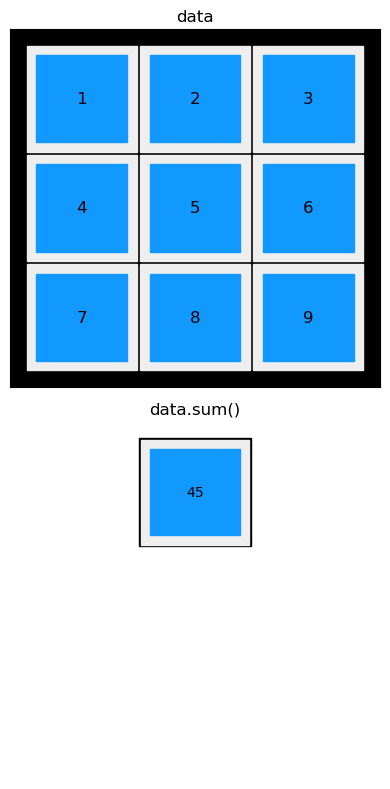

In [24]:
show_array_aggregation(data, None, filename="array_aggregation_1")

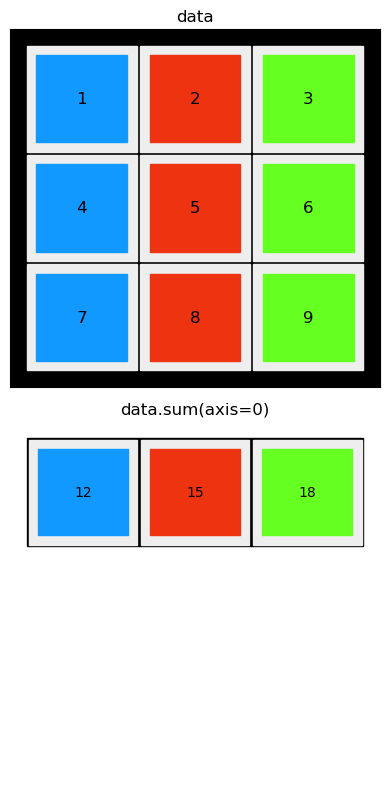

In [25]:
show_array_aggregation(data, 0, filename="array_aggregation_2")

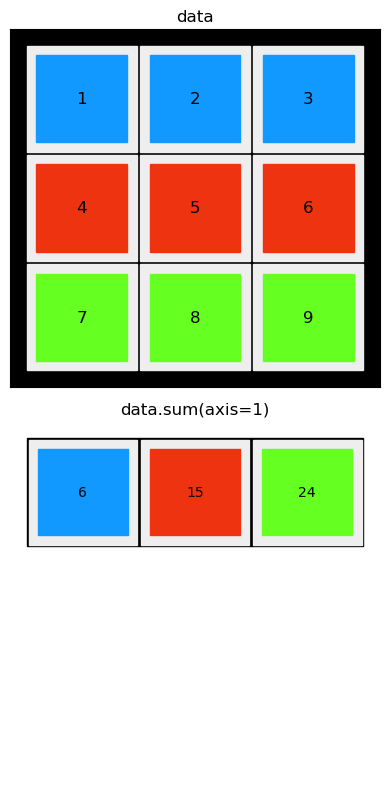

In [26]:
show_array_aggregation(data, 1, filename="array_aggregation_3")

## Broadcasting

In [27]:
def show_array_broadcasting(a, b, filename=None):
    """Visualize broadcasting of arrays"""

    c = a + b
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    data = a
    ax = axes[0]
    ax.patch.set_facecolor('black')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    colors = ['#1199ff', '#ee3311', '#66ff22']
    for (m, n), w in np.ndenumerate(data):
        size = 0.97
        color = '#1199ff'
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        ax.text(m, n, "%d" % data[n, m], ha='center', va='center', fontsize=12)        
    ax.text(2.8, 1, "+", ha='center', va='center', fontsize=22)        
    ax.autoscale_view()
    ax.invert_yaxis()
    
    data = np.zeros_like(a) + b
    ax = axes[1]
    ax.patch.set_facecolor('black')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    colors = ['#1199ff', '#ee3311', '#66ff22']
    for (m, n), w in np.ndenumerate(data):
        size = 0.97
        color = '#eeeeee'
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        if (np.argmax(b.T.shape) == 0 and m == 0) or (np.argmax(b.T.shape) == 1 and n == 0):
            color = '#1199ff'
            #size = 0.8
            rect = plt.Rectangle([n - size / 2, m - size / 2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)
            ax.add_patch(rect)
        ax.text(m, n, "%d" % data[n, m], ha='center', va='center', fontsize=12)        
    ax.text(2.8, 1, "=", ha='center', va='center', fontsize=22)        
    ax.autoscale_view()
    ax.invert_yaxis()

    
    data = c
    ax = axes[2]
    ax.patch.set_facecolor('black')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    colors = ['#1199ff', '#ee3311', '#66ff22']
    for (m, n), w in np.ndenumerate(data):
        size = 0.97
        color = '#1199ff' if w > 0 else '#eeeeee'
        color = '#eeeeee'
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        color = '#1199ff'
        #size = 0.8
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        ax.text(m, n, "%d" % data[n, m], ha='center', va='center', fontsize=12)        
    ax.autoscale_view()
    ax.invert_yaxis()
    
    #fig.tight_layout()
        
    if filename:
        fig.savefig(filename + ".png", dpi=200)
        fig.savefig(filename + ".svg")
        fig.savefig(filename + ".pdf")

In [28]:
a = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33]])

In [29]:
b = np.array([[1, 2, 3]])

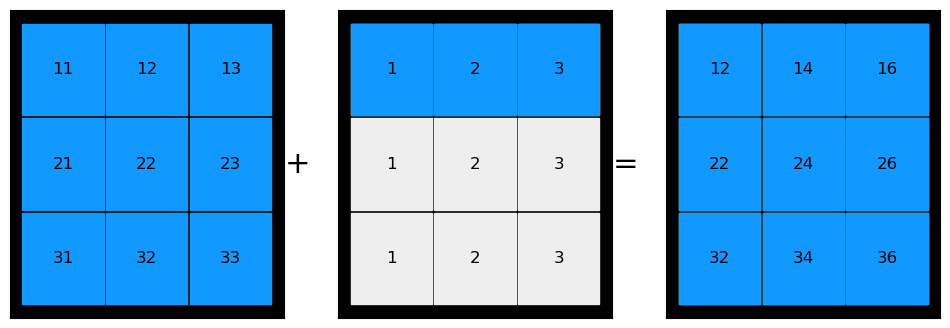

In [30]:
show_array_broadcasting(a, b, filename="array_broadcasting_1")

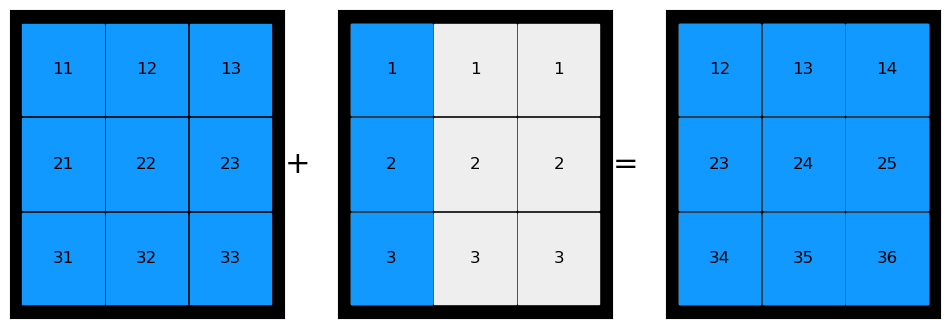

In [31]:
show_array_broadcasting(a, b.T, filename="array_broadcasting_2")

# Versions

In [32]:
%reload_ext version_information

ModuleNotFoundError: No module named 'version_information'

In [33]:
%version_information numpy, matplotlib

UsageError: Line magic function `%version_information` not found.
